<a href="https://colab.research.google.com/github/siddheshpednekar/mlpracticals_sem3/blob/main/boosting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
import numpy as np
from mlxtend.plotting import plot_decision_regions

In [10]:
df = pd.DataFrame()

In [11]:
df['x1']=[1,2,3,4,5,6,6,7,9,9]
df['x2']=[5,3,6,8,1,9,5,8,9,2]
df['label']=[1,1,0,1,0,1,0,1,0,0]

In [8]:
df

,x1,x2
0,1,5
1,2,6
2,3,8
3,4,1
4,5,9
5,6,5
6,7,8
7,9,9
8,9,2


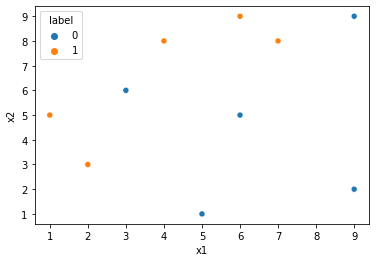

In [12]:
import seaborn as sns
sns.scatterplot(x=df['x1'], y=df['x2'], hue=df['label'])

In [13]:
from sklearn.tree import DecisionTreeClassifier
dt1 = DecisionTreeClassifier(max_depth=1)

In [14]:
x = df.iloc[:, 0:2].values
y = df.iloc[:,-1].values

In [15]:
dt1.fit(x,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'X[1] <= 2.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.75, 0.25, 'gini = 0.469\nsamples = 8\nvalue = [3, 5]')]

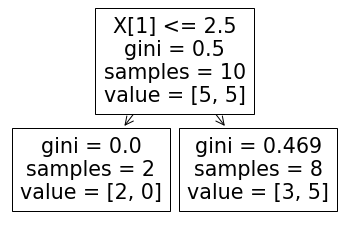

In [33]:
from sklearn.tree import plot_tree
plot_tree(dt1)

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


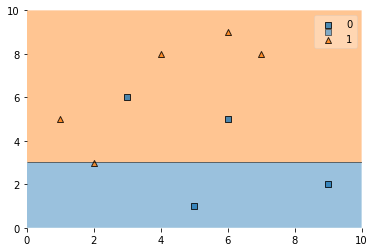

In [16]:
plot_decision_regions(x, y , clf=dt1, legend=True)

In [17]:
df['ypred'] = dt1.predict(x)
df['ypred']

0    1
1    1
2    1
3    1
4    0
5    1
6    1
7    1
8    1
9    0
Name: ypred, dtype: int64

In [18]:
df['weights'] = 1/df.shape[0]

In [19]:
def calculate_weights_error(error):
  return 0.5*np.log((1-error)/error)
calculate_weights_error(0.3)

0.42364893019360184

In [21]:
def updated_weights(row, error = 0.423):
  if row['label']==row['ypred']:
    return row['weights']*np.exp(-error)
  else:
    return row['weights']*np.exp(error)

In [22]:
df['updated__weights'] = df.apply(updated_weights, axis=1)

In [23]:
df['normalzed_weights'] = df['updated__weights']/df['updated__weights'].sum()

In [24]:
df

,x1,x2,label,ypred,weights,updated__weights,normalzed_weights
0,1,5,1,1,0.1,0.065508,0.071475
1,2,3,1,1,0.1,0.065508,0.071475
2,3,6,0,1,0.1,0.152653,0.166559
3,4,8,1,1,0.1,0.065508,0.071475
4,5,1,0,0,0.1,0.065508,0.071475
5,6,9,1,1,0.1,0.065508,0.071475
6,6,5,0,1,0.1,0.152653,0.166559
7,7,8,1,1,0.1,0.065508,0.071475
8,9,9,0,1,0.1,0.152653,0.166559
9,9,2,0,0,0.1,0.065508,0.071475


In [25]:
df['cumsum_upper'] = np.cumsum(df['normalzed_weights'])

In [26]:
df['cumsum_lower'] = df['cumsum_upper']-df['normalzed_weights']

In [27]:
df

,x1,x2,label,ypred,weights,updated__weights,normalzed_weights,cumsum_upper,cumsum_lower
0,1,5,1,1,0.1,0.065508,0.071475,0.071475,0.000000
1,2,3,1,1,0.1,0.065508,0.071475,0.142950,0.071475
2,3,6,0,1,0.1,0.152653,0.166559,0.309508,0.142950
3,4,8,1,1,0.1,0.065508,0.071475,0.380983,0.309508
4,5,1,0,0,0.1,0.065508,0.071475,0.452458,0.380983
5,6,9,1,1,0.1,0.065508,0.071475,0.523933,0.452458
6,6,5,0,1,0.1,0.152653,0.166559,0.690492,0.523933
7,7,8,1,1,0.1,0.065508,0.071475,0.761967,0.690492
8,9,9,0,1,0.1,0.152653,0.166559,0.928525,0.761967
9,9,2,0,0,0.1,0.065508,0.071475,1.000000,0.928525


In [28]:
def fetch_index(df):
  indices = []
  for i in range(df.shape[0]):
    a=np.random.random()
    for index, row in df.iterrows():
      if row['cumsum_upper']>a and a>row['cumsum_lower']:
        indices.append(index)
  return indices

In [29]:
index_values = fetch_index(df)
index_values

[9, 2, 0, 8, 6, 6, 5, 8, 4, 7]

In [30]:
df

,x1,x2,label,ypred,weights,updated__weights,normalzed_weights,cumsum_upper,cumsum_lower
0,1,5,1,1,0.1,0.065508,0.071475,0.071475,0.000000
1,2,3,1,1,0.1,0.065508,0.071475,0.142950,0.071475
2,3,6,0,1,0.1,0.152653,0.166559,0.309508,0.142950
3,4,8,1,1,0.1,0.065508,0.071475,0.380983,0.309508
4,5,1,0,0,0.1,0.065508,0.071475,0.452458,0.380983
5,6,9,1,1,0.1,0.065508,0.071475,0.523933,0.452458
6,6,5,0,1,0.1,0.152653,0.166559,0.690492,0.523933
7,7,8,1,1,0.1,0.065508,0.071475,0.761967,0.690492
8,9,9,0,1,0.1,0.152653,0.166559,0.928525,0.761967
9,9,2,0,0,0.1,0.065508,0.071475,1.000000,0.928525


In [31]:
df2=df.iloc[index_values, [0,1,2,3]]
df2

,x1,x2,label,ypred
9,9,2,0,0
2,3,6,0,1
0,1,5,1,1
8,9,9,0,1
6,6,5,0,1
6,6,5,0,1
5,6,9,1,1
8,9,9,0,1
4,5,1,0,0
7,7,8,1,1


[Text(0.5, 0.75, 'X[1] <= 3.5\ngini = 0.32\nsamples = 10\nvalue = [2, 8]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 8\nvalue = [0, 8]')]

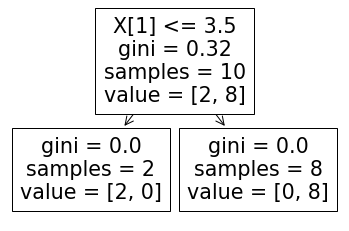

In [34]:
dt2 = DecisionTreeClassifier(max_depth=1)
x = df2.iloc[:, 0:2].values
y = df2.iloc[:,-1].values
dt2.fit(x,y)
plot_tree(dt2)

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


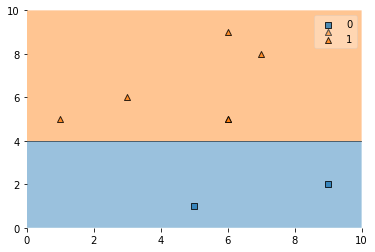

In [35]:
plot_decision_regions(x, y, clf=dt2, legend=True)

In [36]:
df2['ypred'] = dt2.predict(x)
df2['ypred']

9    0
2    1
0    1
8    1
6    1
6    1
5    1
8    1
4    0
7    1
Name: ypred, dtype: int64

In [37]:
error2=calculate_weights_error(0.1)
error2

1.0986122886681098

In [38]:
inp = np.array([6,9]).reshape(1,2)

In [39]:
dt1.predict(inp)

array([1])

In [40]:
dt2.predict(inp)

array([1])

In [41]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(n_estimator=500)

In [43]:
abc.fit(x,y)
abc.predict(x)

array([0, 1, 1, 1, 1, 1, 1, 1, 0, 1])

In [44]:
y

array([0, 1, 1, 1, 1, 1, 1, 1, 0, 1])